<a href="https://colab.research.google.com/github/mike4278/Sleep_Efficiency/blob/main/Sleep_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sleep Efficiency Analyzation and Prediction Tool

# Initialization
- This cell will import all libraries and dependencies.
- The dataset is loaded and the data cleaned by removing unwanted columns and categorizing columns from text to numerical values.
- Training and testing variables are created and applied to the dataset.
- A Random Forest Regression model is initiated and generates predictions using the training data.
- An r2 and mean absolute efficiency score is generated and presented to display accuracy.

In [1]:
# Import libraries and dependencies

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

In [2]:
# Loading the dataset
# By default, the hosted dataset will be downloaded and used.
# An alternate_file_path can be used if local csv is preferred as a substitute.

HOSTED = "https://raw.githubusercontent.com/mike4278/Sleep_Efficiency/main/Sleep_Efficiency.csv"
LOCAL = "Sleep_Efficiency.csv"

# To switch between hosted and local copy, adjust commented path commented below
sleep_data = pd.read_csv(HOSTED)
# sleep_data = pd.read_csv(LOCAL)

# Clean dataset by dropping unneeded columns
sleep_data = sleep_data.drop(['ID', 'Bedtime', 'Wakeup time'], axis=1)

# Categorize text columns with Label Encoder
label_encoder = LabelEncoder()
sleep_data["Gender"] = label_encoder.fit_transform(sleep_data["Gender"])
sleep_data["Smoking status"] = label_encoder.fit_transform(
    sleep_data["Smoking status"])

# Define inputs (X) and outputs (y)
X = sleep_data[["Age", "Gender", "Sleep duration", "Awakenings",
                "Alcohol consumption", "Smoking status", "Exercise frequency"]]
y = sleep_data[["Sleep efficiency"]]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state=42)

# Initialize model with RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [3]:
# Evaluate Sleep Efficiency
r2_eff = r2_score(y_test, y_pred)
mae_eff = mean_absolute_error(y_test, y_pred)

print(f"Sleep Efficiency - R2: {r2_eff:.2f}, MAE: {mae_eff:.2f}")

Sleep Efficiency - R2: 0.70, MAE: 0.06


# Model Visualizations
- Model visualizations are generated using seaborn, matplotlib, and numpy.
- A scatter plot is displayed to showcase prediction accuracy, comparing the actual data to the predictions.
- A histogram is generated to display the frequency of various sleep efficiency results.
- A bar plot is presented to indicate which factors most influence the sleep efficiency score.
- Several boxplots are used to show the relationship between the identified important features and sleep efficiency, including awakenings, alcohol consumption, smoking status, and exercise frequency.

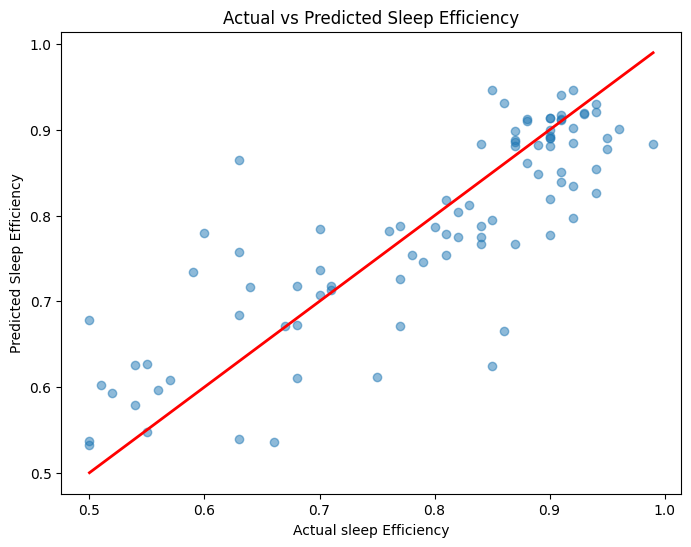

In [4]:
# Scatter plot of actual vs. predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
# Add 45 degree reference line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel("Actual sleep Efficiency")
plt.ylabel("Predicted Sleep Efficiency")
plt.title("Actual vs Predicted Sleep Efficiency")
plt.show()

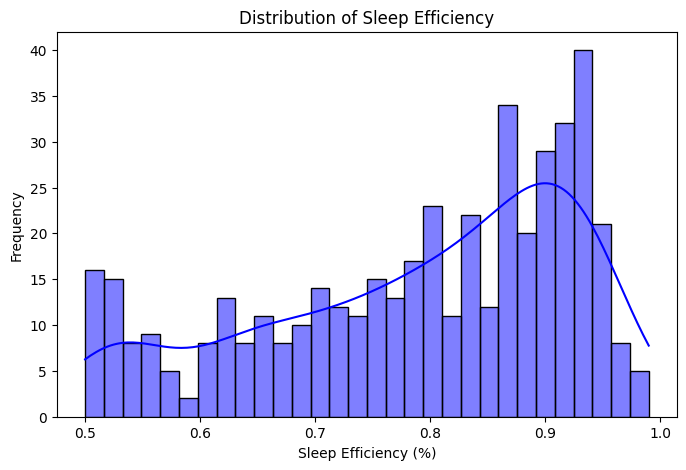

In [5]:
# Histogram of Sleep Efficiency Distribution
plt.figure(figsize=(8, 5))
sns.histplot(sleep_data["Sleep efficiency"], kde=True, bins=30, color="blue")
plt.xlabel("Sleep Efficiency (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Sleep Efficiency")
plt.show()


<ipython-input-7-02f53da9e214>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


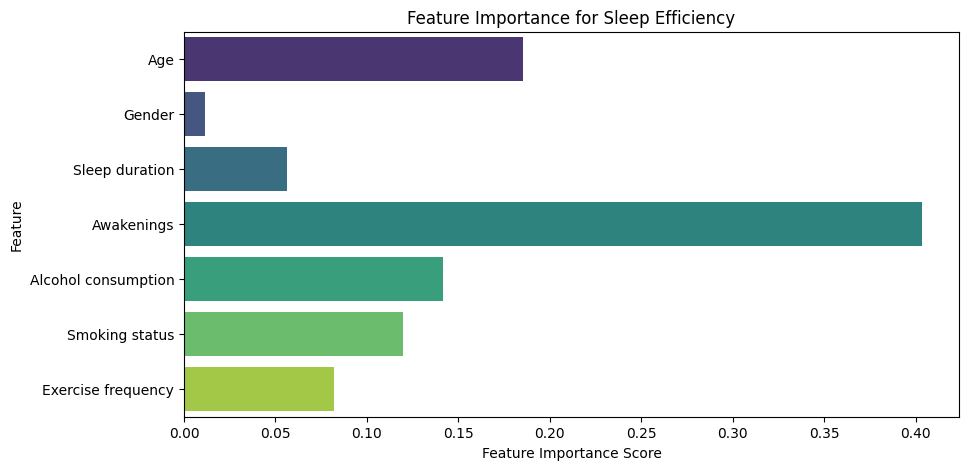

In [7]:
# Create bar plot of Important Features
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance for Sleep Efficiency")
plt.show()

<ipython-input-8-37169980aa03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sleep_data["Awakenings"], y=sleep_data["Sleep efficiency"], palette="coolwarm")


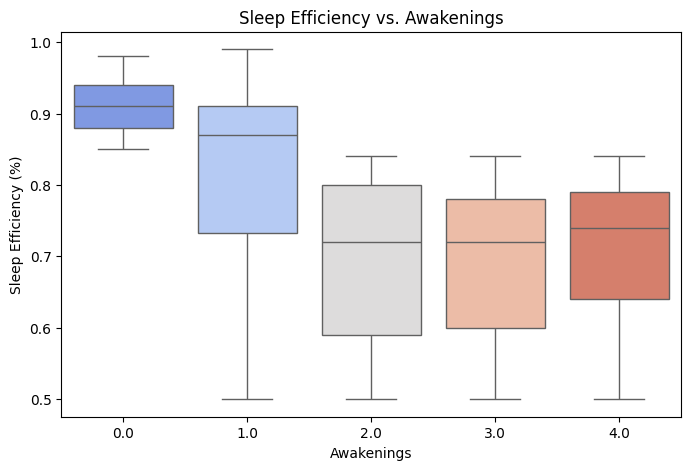

In [8]:
# Sleep Efficiency vs. Awakenings Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=sleep_data["Awakenings"], y=sleep_data["Sleep efficiency"], palette="coolwarm")
plt.xlabel("Awakenings")
plt.ylabel("Sleep Efficiency (%)")
plt.title("Sleep Efficiency vs. Awakenings")
plt.show()

<ipython-input-9-92ee5a9bcad8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sleep_data["Alcohol consumption"], y=sleep_data["Sleep efficiency"], palette="coolwarm")


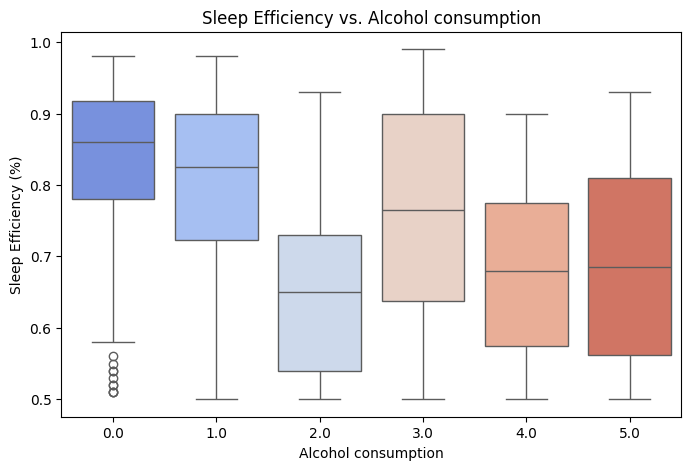

In [9]:
# Sleep Efficiency vs. Alcohol consumption Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=sleep_data["Alcohol consumption"], y=sleep_data["Sleep efficiency"], palette="coolwarm")
plt.xlabel("Alcohol consumption")
plt.ylabel("Sleep Efficiency (%)")
plt.title("Sleep Efficiency vs. Alcohol consumption")
plt.show()

<ipython-input-10-a2424d5777a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sleep_data["Smoking status"], y=sleep_data["Sleep efficiency"], palette="coolwarm")


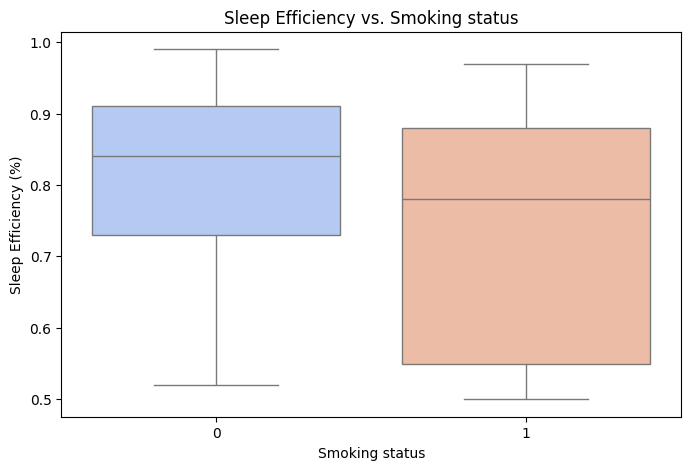

In [10]:
# Sleep Efficiency vs. Smoking status Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=sleep_data["Smoking status"], y=sleep_data["Sleep efficiency"], palette="coolwarm")
plt.xlabel("Smoking status")
plt.ylabel("Sleep Efficiency (%)")
plt.title("Sleep Efficiency vs. Smoking status")
plt.show()

<ipython-input-11-194df0dd8b48>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sleep_data["Exercise frequency"], y=sleep_data["Sleep efficiency"], palette="coolwarm")


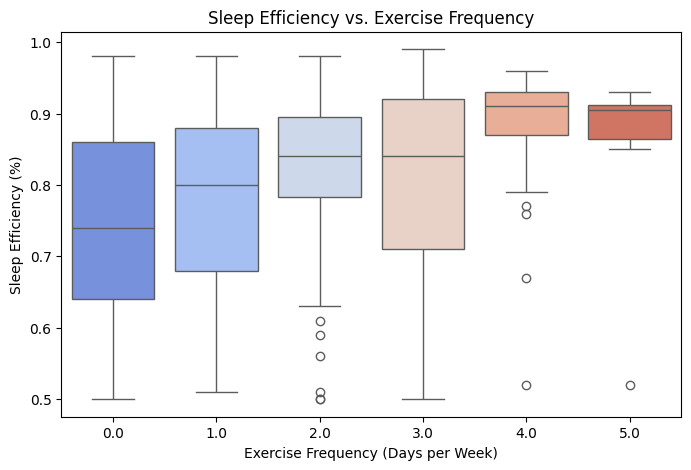

In [11]:
# Sleep Efficiency vs. Exercise Frequency" Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=sleep_data["Exercise frequency"], y=sleep_data["Sleep efficiency"], palette="coolwarm")
plt.xlabel("Exercise Frequency (Days per Week)")
plt.ylabel("Sleep Efficiency (%)")
plt.title("Sleep Efficiency vs. Exercise Frequency")
plt.show()

# Interactive Input
- Using the dataset and model that has been created, users can enter customized entries to predict sleep efficiency results.
- Users are encouraged to experiment with input settings to determine which lifestyle changes will have the biggest impact on their desired sleep efficiency results.
- Once a desirable sleep efficiency result has been generated with obtainable lifestyle habit goals, a Sleep Improvement Plan can initiated.

In [12]:
# Create input widgets for user form
age_input = widgets.IntText(value=30, description='Age:', min=0, max=120, style={'description_width': 'initial'})
sleep_duration_input = widgets.FloatText(value=7.0, description='Sleep Duration (hrs):', min=0, max=24, style={'description_width': 'initial'})
awakenings_input = widgets.IntText(value=1, description='Awakenings:', min=0, max=10, style={'description_width': 'initial'})
alcoholic_beverages_input = widgets.IntText(value=0, description='Alcohol Beverages:', min=0, max=10, style={'description_width': 'initial'})
exercise_days_input = widgets.IntSlider(value=3, min=0, max=7, step=1, description='Exercise Days per Week:', style={'description_width': 'initial'})
gender_input = widgets.RadioButtons(
    options=['Male', 'Female', 'Other'],
    description='Gender:',
    disabled=False,
    style={'description_width': 'initial'}
)
smoker_input = widgets.RadioButtons(
    options=['Yes', 'No'],
    description='Smoker:',
    disabled=False,
    style={'description_width': 'initial'}
)

# Display input widgets
display(age_input, sleep_duration_input, awakenings_input, alcoholic_beverages_input, exercise_days_input, gender_input, smoker_input)

# Output widget to display results
output = widgets.Output()

# Button to submit inputs and predict sleep efficiency value
submit_button = widgets.Button(description="Submit & Predict")

# Button to reset the output display
reset_button = widgets.Button(description="Clear Output Display")

# Function to process user input and make a prediction
def on_submit_button_clicked(b):
    with output:
        # Capture user inputs
        user_data = {
            'Age': age_input.value,
            'Gender': 1 if gender_input.value == 'Male' else 0,  # Encode gender (1=Male, 0=Female/Other)
            'Sleep duration': sleep_duration_input.value,
            'Awakenings': awakenings_input.value,
            'Alcohol consumption': alcoholic_beverages_input.value,
            'Smoking status': 1 if smoker_input.value == 'Yes' else 0,  # Encode smoker (1=Yes, 0=No)
            'Exercise frequency': exercise_days_input.value
        }

        # Convert user input into DataFrame
        user_df = pd.DataFrame([user_data])

        # Make a prediction & extract predicted value
        predicted_efficiency = model.predict(user_df)[0]

        # Display user inputs and prediction in the output area
        print("\nUser Input:")
        for key, value in user_data.items():
            print(f"{key}: {value}")

        print(f"\nPredicted Sleep Efficiency: {predicted_efficiency:.2f}%")

# Reset function
def reset_output(b):
    with output:
        clear_output()

# Add button click event
submit_button.on_click(on_submit_button_clicked)
reset_button.on_click(reset_output)

# Display the submit button and output area
display(submit_button, output)
display(reset_button)


IntText(value=30, description='Age:', style=DescriptionStyle(description_width='initial'))

FloatText(value=7.0, description='Sleep Duration (hrs):', style=DescriptionStyle(description_width='initial'))

IntText(value=1, description='Awakenings:', style=DescriptionStyle(description_width='initial'))

IntText(value=0, description='Alcohol Beverages:', style=DescriptionStyle(description_width='initial'))

IntSlider(value=3, description='Exercise Days per Week:', max=7, style=SliderStyle(description_width='initial'…

RadioButtons(description='Gender:', options=('Male', 'Female', 'Other'), style=DescriptionStyle(description_wi…

RadioButtons(description='Smoker:', options=('Yes', 'No'), style=DescriptionStyle(description_width='initial')…

Button(description='Submit & Predict', style=ButtonStyle())

Output()

Button(description='Clear Output Display', style=ButtonStyle())